In [101]:
import pandas
import os
import matplotlib.pyplot as plt
import random
import kagglehub
import pandas as pd


#path = kagglehub.dataset_download("shakthisairam123/gym-workout-imu-dataset")
path = "data"

In [102]:
#checking data without filtering
data = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        data.append(pd.read_csv(os.path.join(dirname, filename)))

print(data[0].keys())
data[0].head()



Index(['secondsElapsed', 'wristMotion_rotationRateX',
       'wristMotion_rotationRateY', 'wristMotion_rotationRateZ',
       'wristMotion_gravityX', 'wristMotion_gravityY', 'wristMotion_gravityZ',
       'wristMotion_accelerationX', 'wristMotion_accelerationY',
       'wristMotion_accelerationZ', 'wristMotion_quaternionW',
       'wristMotion_quaternionX', 'wristMotion_quaternionY',
       'wristMotion_quaternionZ', 'weight', 'set', 'reps', 'activity',
       'activityEncoded'],
      dtype='object')


,secondsElapsed,wristMotion_rotationRateX,wristMotion_rotationRateY,wristMotion_rotationRateZ,wristMotion_gravityX,wristMotion_gravityY,wristMotion_gravityZ,wristMotion_accelerationX,wristMotion_accelerationY,wristMotion_accelerationZ,wristMotion_quaternionW,wristMotion_quaternionX,wristMotion_quaternionY,wristMotion_quaternionZ,weight,set,reps,activity,activityEncoded
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,15.0,CGCR,2
1,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,15.0,CGCR,2
2,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,15.0,CGCR,2
3,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,15.0,CGCR,2
4,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,15.0,CGCR,2


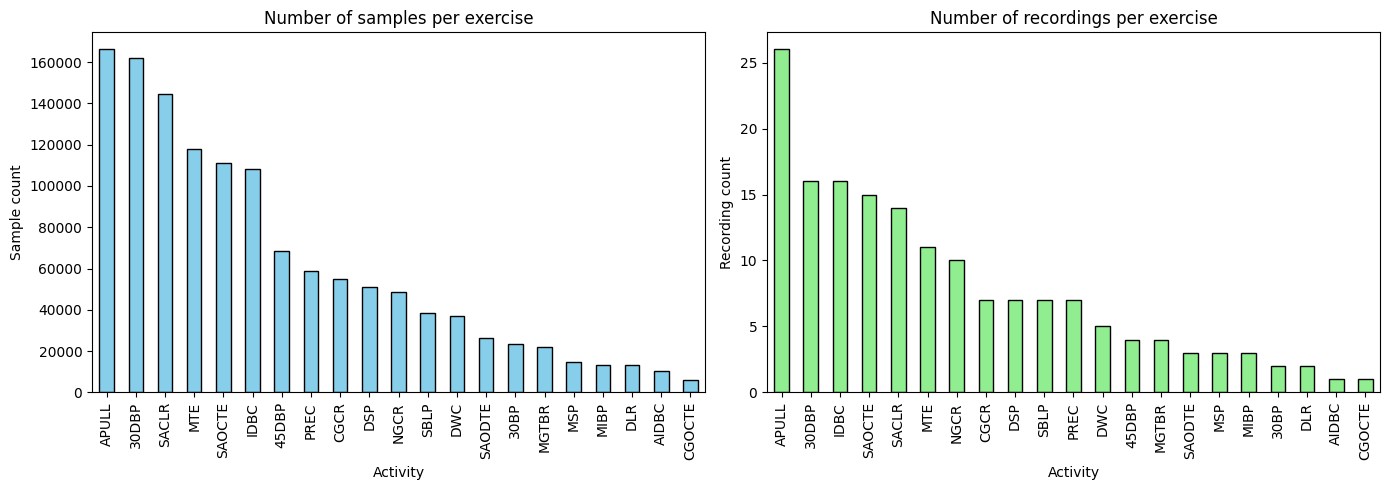

In [103]:
def plots():
    all_data = pd.concat(data, ignore_index=True)

    sample_counts = all_data["activity"].value_counts()
    recording_counts = pd.Series([df["activity"].iloc[0] for df in data]).value_counts()


    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    
    # Samples per exercise(How many data points each exercise has)
    sample_counts.plot(kind="bar", ax=axes[0], color="skyblue", edgecolor="black")
    axes[0].set_title("Number of samples per exercise")
    axes[0].set_xlabel("Activity")
    axes[0].set_ylabel("Sample count")
    axes[0].tick_params(axis="x", rotation=90)
    
    # Recordings per execise(How many times exercise was done)
    recording_counts.plot(kind="bar", ax=axes[1], color="lightgreen", edgecolor="black")
    axes[1].set_title("Number of recordings per exercise")
    axes[1].set_xlabel("Activity")
    axes[1].set_ylabel("Recording count")
    axes[1].tick_params(axis="x", rotation=90)
    
    plt.tight_layout()
    plt.show()
    
plots()

    

In [104]:
#first and last values are empty for each file, also only used will be gyroscope and accelerometer data, everything else is dropped here
def filter_data(df):
    df_filtered = df.copy()
    min_time = df_filtered["secondsElapsed"].min() + 1.5
    max_time = df_filtered["secondsElapsed"].max() - 1.5
    df_filtered = df_filtered[(df_filtered["secondsElapsed"] >= min_time) & (df_filtered["secondsElapsed"] <= max_time)].reset_index(drop=True)
    df_filtered = df_filtered.drop(
    columns=[
        "wristMotion_gravityX",
        "wristMotion_gravityY",
        "wristMotion_gravityZ",
        "wristMotion_quaternionW",
        "wristMotion_quaternionX",
        "wristMotion_quaternionY",
        "wristMotion_quaternionZ",
        #"weight",
        #"set",
        #"reps",
        #"activity",
        #"activityEncoded",
    ],
    
    )
    return df_filtered


# Smooth noisy sensor signals using a moving average.
def smooth_columns(df, window):
    df_smoothed = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df_smoothed[col] = df[col].rolling(window=window, center=True).mean()
    return df_smoothed



In [105]:
#loading data with filtering
import pandas as pd
import os

data_list = []  # will store filtered DataFrames
activity_list = []  # will store activity per file

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        df = pd.read_csv(os.path.join(dirname, filename))
        df_filtered = filter_data(df)
        if not df_filtered.empty and 'activity' in df_filtered.columns:
            data_list.append(df_filtered)
            # store activity for this recording (assume all rows in a file have the same activity)
            activity_list.append(df_filtered['activity'].iloc[0])


# Count how many recordings exist per activity
activity_counts = pd.Series(activity_list).value_counts()

# Keep only activities with more than 8 recordings (for now)
valid_activities = activity_counts[activity_counts > 8].index

filtered_data_list = []
for df in data_list:
    if df['activity'].iloc[0] in valid_activities:
        filtered_data_list.append(df)


#time, rotations(X,Y,Z), acceleration(X,Y,Z), 'weight', 'set', 'reps', 'activity', 'activityEncoded'

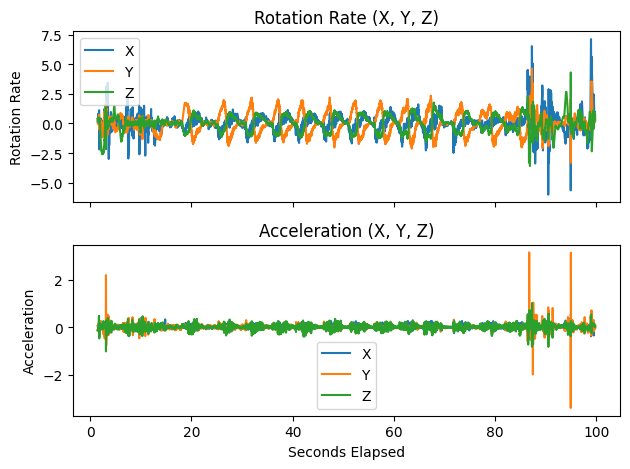

In [106]:
#Checking random sample
data = filtered_data_list
n = random.randint(0, len(data) - 1)
df = data[n]

#df = smooth_columns(df, 5) #smoothing window Works better without this

fig, axes = plt.subplots(2,1,sharex = True)

#gyroscope data
axes[0].plot(df["secondsElapsed"], df["wristMotion_rotationRateX"], label="X")
axes[0].plot(df["secondsElapsed"], df["wristMotion_rotationRateY"], label="Y")
axes[0].plot(df["secondsElapsed"], df["wristMotion_rotationRateZ"], label="Z")
axes[0].set_ylabel("Rotation Rate")
axes[0].set_title("Rotation Rate (X, Y, Z)") 
axes[0].legend()

#accelerometer data
axes[1].plot(df["secondsElapsed"], df["wristMotion_accelerationX"], label="X")
axes[1].plot(df["secondsElapsed"], df["wristMotion_accelerationY"], label="Y")
axes[1].plot(df["secondsElapsed"], df["wristMotion_accelerationZ"], label="Z")
axes[1].set_ylabel("Acceleration")
axes[1].set_xlabel("Seconds Elapsed")
axes[1].set_title("Acceleration (X, Y, Z)")
axes[1].legend()

plt.tight_layout()
plt.show()

Label encoding. Each label gets a corresponding id

In [107]:
#Gives each activity ID
all_activities = pd.concat([df['activity'] for df in data], ignore_index=True)

#activity mapping
categories = all_activities.astype("category").cat.categories
activity_to_id = {cat: idx for idx, cat in enumerate(categories)}

print(activity_to_id)
#gives new column activity encoded to each df
for i, df in enumerate(data):
    df["activityEncoded"] = df["activity"].map(activity_to_id)
    data[i] = df

{'30DBP': 0, 'APULL': 1, 'IDBC': 2, 'MTE': 3, 'NGCR': 4, 'SACLR': 5, 'SAOCTE': 6}


In [108]:
imu_features = [
    "wristMotion_rotationRateX", "wristMotion_rotationRateY", "wristMotion_rotationRateZ",
    "wristMotion_accelerationX", "wristMotion_accelerationY", "wristMotion_accelerationZ"
]

In [109]:
import numpy as np

#checking for NaN in data
for i, df in enumerate(data):
    df[imu_features] = df[imu_features].fillna(0).replace([np.inf, -np.inf], 0)
    data[i] = df
        

In [110]:
import torch

#Select Gpu
device = torch.device("cuda")


In [111]:
def preprocess_sample(window ,y, smooth_kernel=5, downsample_factor=2, downsample_mode="avg"):

    X = window.astype(np.float32)

    #1. Creates a smoothing kernel
    if smooth_kernel and smooth_kernel > 1:
        k = int(smooth_kernel)
        if k % 2 == 0:
             k += 1 #enforce odd

        kernel = np.ones(k, dtype=np.float32) / k
        X = np.vstack([
            np.convolve(X[:, f], kernel, mode="same")
            for f in range(X.shape[1])
        ]).T.astype(np.float32)


   
    #2. Downsample
    if downsample_factor and downsample_factor > 1:
        d = int(downsample_factor)
        if downsample_mode == "avg":
            T, F = X.shape
            # pad to make T divisible by d (repeat last row)
            pad_needed = (-T) % d
            if pad_needed:
                X = np.concatenate([X, np.repeat(X[-1:, :], pad_needed, axis=0)], axis=0)
            X = X.reshape(-1, d, F).mean(axis=1)
        else:  # "slice"
            X = X[::d]

    return X, y


In [112]:
from torch.utils.data import Dataset

class IMUDataset(Dataset):
    def __init__(self, dataframes, features, window_size, step_size,
                 preprocess_fn=None, preprocess_kwargs=None):
        """
        dataframes: list of pandas DataFrames
        features: list of feature column names to use
        window_size: number of timesteps per window (e.g. 300 = 3s at 100Hz)
        step_size: overlap between windows (e.g. 150 = 50% overlap)
        """
        self.samples = []
        self.preprocess_fn = preprocess_fn
        self.preprocess_kwargs = preprocess_kwargs or {}

        for df in dataframes: #each file is a dataframe 
            X = df[features].values #X values for one dataframe
            y = int(df["activityEncoded"].iloc[0])  # same label for the whole sequence

            for start in range(0, len(X) - window_size + 1, step_size):
                end = start + window_size
                window = X[start:end]


                #What is happening here?
                if self.preprocess_fn is not None:
                    window, y_out = self.preprocess_fn(window, y, **self.preprocess_kwargs) #applying preprocessing function
                    y_use = y_out #preprocessed
                else:
                    y_use = y #not preprocessed

                self.samples.append((window, y_use)) #appending every window + corresponding activity

    def __len__(self):
        return len(self.samples) #number of windows gathered

    def __getitem__(self, idx):
        X, y = self.samples[idx]
        X = torch.tensor(X, dtype=torch.float32)  # (window_size, num_features)
        y = torch.tensor(y, dtype=torch.long)     # Class
        return X, y

Implementing StratifiedShuffleSplit
Dont understand this part
Used for dividing train/test for time series data

In [113]:

from sklearn.model_selection import StratifiedShuffleSplit
import warnings

window_size = 300 #TODO                # timesteps per window 
step_size = 100                   # overlap between windows 
train_split = 0.8


#What is happening here?
session_labels = np.array([int(df["activityEncoded"].iloc[0]) for df in data])
n_sessions = len(data)
target_train = int(train_split * n_sessions)

def stratified_session_split(data, labels, train_ratio=0.8, seed=42):
    labels = np.asarray(labels)
    idx_all = np.arange(len(labels))

    # Classes with only 1 session cannot be stratified -> force them into TRAIN
    _, counts = np.unique(labels, return_counts=True)
    cls_counts = dict(zip(*np.unique(labels, return_counts=True)))
    rare_classes = {c for c, k in cls_counts.items() if k < 2}

    forced_train_idx = np.array([i for i in idx_all if labels[i] in rare_classes], dtype=int)
    rest_idx = np.array([i for i in idx_all if labels[i] not in rare_classes], dtype=int)

    if len(rest_idx) == 0:
        warnings.warn("All classes are rare (count<2). Putting all sessions in TRAIN.")
        return forced_train_idx, np.array([], dtype=int)

    # Desired train size for the remaining pool
    remaining_train_needed = max(0, target_train - len(forced_train_idx))
    remaining_total = len(rest_idx)

    if remaining_total == 0 or remaining_train_needed == 0:
        train_idx = forced_train_idx
        test_idx = np.setdiff1d(idx_all, train_idx, assume_unique=False)
        return np.sort(train_idx), np.sort(test_idx)

    # Compute adjusted test_size for the remaining pool
    adjusted_train_ratio = min(1.0, remaining_train_needed / remaining_total)
    adjusted_test_size = 1.0 - adjusted_train_ratio

    # Stratified split on the remaining pool
    sss = StratifiedShuffleSplit(n_splits=1, test_size=adjusted_test_size, random_state=seed)
    rest_labels = labels[rest_idx]
    (rest_train_sel, rest_test_sel), = sss.split(rest_idx, rest_labels)

    train_idx = np.concatenate([forced_train_idx, rest_idx[rest_train_sel]])
    test_idx  = rest_idx[rest_test_sel]

    # Safety: ensure every class present in the whole dataset appears in TRAIN
    present_all = set(np.unique(labels))
    present_train = set(np.unique(labels[train_idx]))
    missing_in_train = present_all - present_train
    if missing_in_train:
        warnings.warn(f"Some classes had too few sessions; moving one session per missing class to TRAIN: {missing_in_train}")
        for cls in list(missing_in_train):
            cand = np.where(labels[test_idx] == cls)[0]
            if len(cand) > 0:
                move = test_idx[cand[0]]
                train_idx = np.append(train_idx, move)
                test_idx = np.delete(test_idx, cand[0])

    return np.sort(train_idx), np.sort(test_idx)



# ---- use the splitter ----
train_idx, test_idx = stratified_session_split(data, session_labels, train_ratio=train_split, seed=42)
train_dfs = [data[i] for i in train_idx]
test_dfs  = [data[i] for i in test_idx]

print(f"Sessions -> train: {len(train_dfs)} | test: {len(test_dfs)}")
# Quick distribution check
test_classes = sorted({int(df['activityEncoded'].iloc[0]) for df in test_dfs})
train_classes = sorted({int(df['activityEncoded'].iloc[0]) for df in train_dfs})
missing_in_test = sorted(set(train_classes) - set(test_classes))
print(f"Train classes ({len(train_classes)}):", train_classes)
print(f"Test classes ({len(test_classes)}):", test_classes, "\nMissing in test:", missing_in_test) 

Sessions -> train: 86 | test: 22
Train classes (7): [0, 1, 2, 3, 4, 5, 6]
Test classes (7): [0, 1, 2, 3, 4, 5, 6] 
Missing in test: []


In [114]:


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader


# 2) Fit scaler ONLY on TRAIN using a DataFrame 
scaler = StandardScaler()
train_stack_df = pd.concat([df.loc[:, imu_features] for df in train_dfs], ignore_index=True)
scaler.fit(train_stack_df)   

# 3) Transform in place (preserve column order and names)
for df in train_dfs:
    df.loc[:, imu_features] = scaler.transform(df.loc[:, imu_features])

for df in test_dfs:
    df.loc[:, imu_features] = scaler.transform(df.loc[:, imu_features])



# 4) Build datasets (one per split) from the pre-scaled DataFrames
train_dataset = IMUDataset(
    dataframes=train_dfs,
    features=imu_features,
    window_size=window_size,
    step_size=step_size,
    preprocess_fn=preprocess_sample,
    preprocess_kwargs=dict(smooth_kernel=5, downsample_factor=2, downsample_mode="avg")
)

test_dataset = IMUDataset(
    dataframes=test_dfs,
    features=imu_features,
    window_size=window_size,
    step_size=step_size,
    preprocess_fn=preprocess_sample,   
    preprocess_kwargs=dict(smooth_kernel=5, downsample_factor=2, downsample_mode="avg")
)

# 5) DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=1,  shuffle=False)

#what does this do?
assert set(map(id, train_dfs)).isdisjoint(set(map(id, test_dfs))), "Leak: same session in both splits"



In [115]:
print("Train dataset size:", len(train_dataset))

X, y = train_dataset[0]
print("X shape:", X.shape)   # (window_size, num_features)
print("y:", y)               # label

for X, y in train_loader:
    print("Batch X shape:", X.shape)   # (batch_size, window_size, num_features)
    print("Batch y shape:", y.shape)   # (batch_size,)
    break

#Test dataset info
print("Test dataset size:", len(test_dataset))
X, y = test_dataset[0]
print("X shape:", X.shape)   # (window_size, num_features)
print("y:", y)               # label

for X, y in test_loader:
    print("Batch X shape:", X.shape)   # (batch_size, window_size, num_features)
    print("Batch y shape:", y.shape)   # (batch_size,)
    break

Train dataset size: 6201
X shape: torch.Size([150, 6])
y: tensor(6)
Batch X shape: torch.Size([32, 150, 6])
Batch y shape: torch.Size([32])
Test dataset size: 1792
X shape: torch.Size([150, 6])
y: tensor(2)
Batch X shape: torch.Size([1, 150, 6])
Batch y shape: torch.Size([1])


Handling imbalanced data

In [116]:
from sklearn.utils.class_weight import compute_class_weight


y_train = [train_dataset[i][1].item() for i in range(len(train_dataset))]
id_to_activity = dict(enumerate(categories))


classes = np.array(sorted(id_to_activity.keys()))


class_weights_np = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)



class_weights = torch.tensor(class_weights_np, dtype=torch.float32, device='cuda')


class_counts = np.bincount(y_train, minlength=classes.max() + 1)

df_weights = pd.DataFrame({
    "Class ID": classes,
    "Activity": [id_to_activity[i] for i in classes],
    "Count": class_counts[classes],     # index by 'classes' to stay aligned
    "Weight": class_weights_np
}).sort_values("Weight", ascending=False, ignore_index=True)

print(df_weights)





   Class ID Activity  Count    Weight
0         4     NGCR    345  2.567702
1         5    SACLR    798  1.110097
2         2     IDBC    806  1.099078
3         6   SAOCTE    839  1.055849
4         3      MTE    967  0.916088
5         1    APULL   1201  0.737600
6         0    30DBP   1245  0.711532


In [117]:
num_features = len(imu_features)

num_classes = len(activity_to_id)

learning_rate = 2e-4 
num_epochs = 50

#model parameters
hidden_dim = 64
lstm_layers = 2

#regularization
clip_grad_norm = 1.0





In [118]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super(SelfAttention, self).__init__()
        self.query = nn.Linear(embed_dim, embed_dim)
        self.key   = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)
        self.scale = torch.sqrt(torch.tensor(embed_dim).float())

    def forward(self, x):
        # x: (batch, seq_len, embed_dim)
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)
        attn_scores = torch.bmm(Q, K.transpose(1, 2)) / self.scale
        attn_weights = F.softmax(attn_scores, dim=-1)
        out = torch.bmm(attn_weights, V)
        return out

class DeepCNNLSTMWithAttention(nn.Module):
    def __init__(self, num_features, num_classes, hidden_dim=64, lstm_layers=1):
        super(DeepCNNLSTMWithAttention, self).__init__()

        # CNN part
        self.conv1 = nn.Conv1d(num_features, 16, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm1d(16)
        self.drop1 = nn.Dropout(0.2)

        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm1d(32)
        self.drop2 = nn.Dropout(0.2)

        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm1d(64)
        self.drop3 = nn.Dropout(0.2)

        # LSTM part
        self.lstm = nn.LSTM(
            input_size=64,
            hidden_size=hidden_dim,
            num_layers=lstm_layers,
            batch_first=True,
        )

        # Self‑attention
        self.attention = SelfAttention(hidden_dim)

        # Output classifier
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        # x shape: (batch, seq_len, num_features)
        x = x.permute(0, 2, 1)  # (batch, features, seq_len)

        x = F.relu(self.bn1(self.conv1(x)))
        x = self.drop1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.drop2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.drop3(x)

        # (batch, channels, seq_len) → (batch, seq_len, channels)
        x = x.permute(0, 2, 1)

        # LSTM
        lstm_out, _ = self.lstm(x)  # (batch, seq_len, hidden_dim)

        # Self‑attention
        attn_out = self.attention(lstm_out)  # (batch, seq_len, hidden_dim)

        # take output from last time step
        out = attn_out[:, -1, :]

        out = self.fc(out)
        return out

In [119]:
# Ensure class weights and model output dimension match
num_classes = len(activity_to_id)

# Move class weights to device
if isinstance(class_weights, torch.Tensor):
    class_weights = class_weights.float().to(device)
else:
    class_weights = torch.tensor(class_weights, dtype=torch.float32, device=device)

if class_weights.numel() != num_classes:
    raise ValueError(
        f"Class weight count ({class_weights.numel()}) does not match num_classes ({num_classes}). "
        "Check label encoding and split logic."
    )

# Define loss
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# Define model with dynamic dimensions
model = DeepCNNLSTMWithAttention(
    num_features=num_features,
    num_classes=num_classes,
    hidden_dim=hidden_dim,
    lstm_layers=lstm_layers
).to(device)

# Optimizer
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

Training loop

In [120]:
best_val_loss = float("inf")
patience = 5
trigger_times = 0
best_val_acc = 0.0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    correct = 0
    total = 0
    running_loss = 0.0

    model.train() #sets model to training mode
    for X,y in train_loader:
        X, y = X.to(device), y.to(device) #move to gpu
        optimizer.zero_grad() #sets gradients to zero
        #Forward 
        outputs = model(X)
        #Loss
        y = y.long().to(device)
        loss = criterion(outputs, y)
        # Skip batch if loss is NaN
        if torch.isnan(loss):
            print("NaN detected! Skipping batch.")
            continue

        #Backward
        loss.backward()

        #gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.5)
        #updates parameters
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs,dim=1)
        correct += (predicted == y).sum().item()
        total += y.size(0)

    #test accuracy
    epoch_acc = 100 * correct / total
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    train_accuracies.append(epoch_acc)
    print(f"Epoch {epoch}: loss={avg_loss:.4f}, accuracy={epoch_acc:.2f}%")

    #validation accuracy
    model.eval() #sets model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for X_val, y_val in test_loader:
            X_val, y_val = X_val.to(device), y_val.to(device) 
            outputs_val = model(X_val)
            loss_val = criterion(outputs_val, y_val)
            val_loss += loss_val.item()
            _, predicted_val = torch.max(outputs_val, dim=1)
            val_correct += (predicted_val == y_val).sum().item()
            val_total += y_val.size(0)

    val_loss /= len(test_loader)
    val_acc = 100 * val_correct / val_total
 

    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Validation: loss={val_loss:.4f}, accuracy={val_acc:.2f}%")

    # early stopping logic with val_loss improvement check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        # saves the best model
        torch.save(model.state_dict(), "best_model_CNN+LSTM.pt")
    else:
        trigger_times += 1
        print(f"No improvement in validation loss. Trigger times: {trigger_times}")
        if trigger_times >= patience:
            print("Early stopping!")
            break

    #  # early stopping logic with val_accuracy improvement check
    # if val_acc > best_val_acc:
    #     best_val_acc = val_acc
    #     best_val_loss = val_loss
    #     trigger_times = 0
    #     # saves the best model
    #     torch.save(model.state_dict(), "best_model.pt")
    # else:
    #     trigger_times += 1
    #     print(f"No improvement in validation accuracy. Trigger times: {trigger_times}")
    #     if trigger_times >= patience:
    #         print("Early stopping!")
    #         break



Epoch 0: loss=1.9419, accuracy=21.66%
Validation: loss=1.8937, accuracy=38.39%
Epoch 1: loss=1.6732, accuracy=30.53%
Validation: loss=1.6514, accuracy=31.03%
Epoch 2: loss=1.3774, accuracy=40.56%
Validation: loss=1.6830, accuracy=48.44%
No improvement in validation loss. Trigger times: 1
Epoch 3: loss=1.2007, accuracy=50.02%
Validation: loss=1.5556, accuracy=52.06%
Epoch 4: loss=1.0936, accuracy=54.39%
Validation: loss=1.4928, accuracy=56.98%
Epoch 5: loss=0.9942, accuracy=57.97%
Validation: loss=1.4571, accuracy=58.43%
Epoch 6: loss=0.8719, accuracy=62.94%
Validation: loss=1.3990, accuracy=63.06%
Epoch 7: loss=0.7849, accuracy=69.04%
Validation: loss=1.3495, accuracy=65.51%
Epoch 8: loss=0.7149, accuracy=73.02%
Validation: loss=1.4692, accuracy=63.67%
No improvement in validation loss. Trigger times: 1
Epoch 9: loss=0.6395, accuracy=76.13%
Validation: loss=1.5022, accuracy=64.51%
No improvement in validation loss. Trigger times: 2
Epoch 10: loss=0.5902, accuracy=78.54%
Validation: los

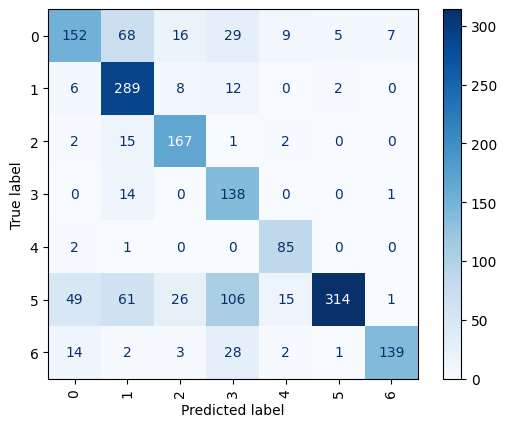

In [121]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

device = torch.device("cuda")
model = model.to(device)  

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for X, y in test_loader:
        X = X.to(device)
        y = y.to(device)
        outputs = model(X)
        preds = outputs.argmax(dim=1) #predicted class is the one with highest score

        y_true.extend(y.cpu().tolist())
        y_pred.extend(preds.cpu().tolist())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.show()

In [122]:
labels_present = sorted(set(y_true) | set(y_pred))
target_names = [id_to_activity[i] if i < len(id_to_activity) else f"class_{i}" for i in labels_present]

print(classification_report(
    y_true, y_pred,
    labels=labels_present,
    target_names=target_names,
    zero_division=0
))


              precision    recall  f1-score   support

       30DBP       0.68      0.53      0.59       286
       APULL       0.64      0.91      0.75       317
        IDBC       0.76      0.89      0.82       187
         MTE       0.44      0.90      0.59       153
        NGCR       0.75      0.97      0.85        88
       SACLR       0.98      0.55      0.70       572
      SAOCTE       0.94      0.74      0.82       189

    accuracy                           0.72      1792
   macro avg       0.74      0.78      0.73      1792
weighted avg       0.79      0.72      0.72      1792

